In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
i=224
b=32

Drive Data Link:/content/26 (46).jpg

In [37]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [38]:
train_data=train_gen.flow_from_directory(
    "/content/drive/MyDrive/flowers",
    target_size=(i,i),
    batch_size=b,
    class_mode="categorical",
    subset="training"
)

Found 1286 images belonging to 5 classes.


In [39]:
val_data=train_gen.flow_from_directory(
    "/content/drive/MyDrive/flowers",
    target_size=(i,i),
    batch_size=b,
    class_mode="categorical",
    subset="validation"
)

Found 318 images belonging to 5 classes.


In [46]:
class_indices=train_data.class_indices
class_name=list(class_indices.keys())

In [40]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(i,i,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(train_data,epochs=3,validation_data=val_data,batch_size=b)

Epoch 1/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3734 - loss: 1.4162

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.3741 - loss: 1.4148 - val_accuracy: 0.5314 - val_loss: 1.0671
Epoch 2/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.5494 - loss: 1.0945 - val_accuracy: 0.5943 - val_loss: 0.9573
Epoch 3/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.6365 - loss: 0.9741 - val_accuracy: 0.5818 - val_loss: 1.0269


In [44]:
model.save("/content/drive/MyDrive/flowers/flowers.h5")


In [45]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/drive/MyDrive/flowers/flowers.h5")
print("Model Load Successfully")

Model Load Successfully


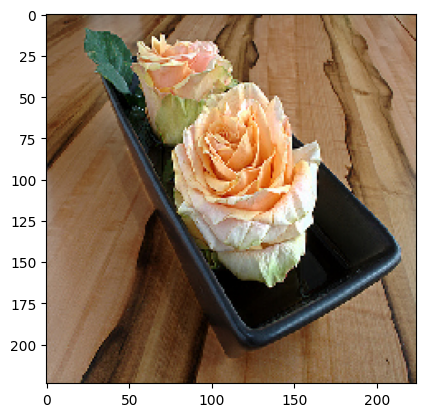

In [47]:
path="/content/drive/MyDrive/flowers/rose/2392457180_f02dab5c65.jpg"
img=image.load_img(path,target_size=(i,i))
plt.imshow(img)
plt.axis()
plt.show()

In [49]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255
prediction=model.predict(img_array)
index=np.argmax(prediction[0])
print(class_name[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
rose
